### Dropout

*Step 1: Mask activation units according to keep_prob* 
$$D = np.random.rand(\text{dims of } A) < \text{keep_prob}\\A = np.multiply(A, D)$$

*Step 2: Normalize activations*
$$A = \frac{A}{\text{keep_prob}}$$

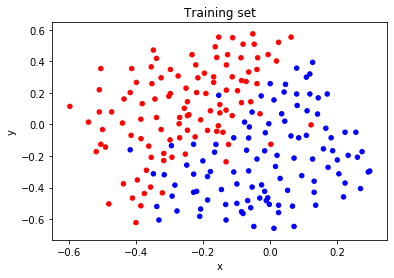

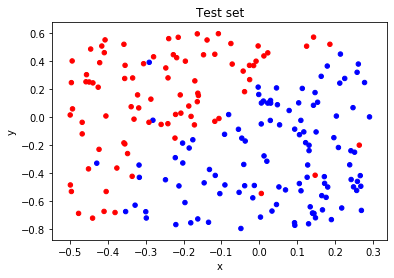

In [1]:
from utils import initialize_weights, linear_forward, sigmoid, relu, linear_backward, sigmoid_backward, activation_backward, update_params, cost, predict 
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

data = scipy.io.loadmat('datasets/data.mat')
train_X = data['X'].T
train_Y = data['y'].T
test_X = data['Xval'].T
test_Y = data['yval'].T

plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Training set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(test_X[0, :], test_X[1, :], c=test_Y[0], s=20, cmap=plt.cm.bwr)
plt.title('Test set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
def activation_forward(Aprev, W, b, activation, keep_prob):
    """
    Compute activation values "A" of the forward propagation
    """
    np.random.seed(1)
    Z, linear_cache = linear_forward(Aprev, W, b)
    if activation=='sigmoid':
        A = sigmoid(Z)
        D = (np.random.rand(A.shape[0] ,A.shape[1]) < keep_prob).astype(int)
    if activation=='relu':
        A = relu(Z)
        D = (np.random.rand(A.shape[0] ,A.shape[1]) < keep_prob).astype(int)
        A = np.multiply(A, D)
        A = A / keep_prob
    cache = (linear_cache, Z, D)
    assert(A.shape == Z.shape)
    return A, cache

def forward_prop(X, param, layer_size, keep_prob):
    """
    Forward propagation process
    """
    np.random.seed(1)
    caches = []
    Aprev = X
    L = len(layer_size)
    for l in range(1,L-1):
        A, cache = activation_forward(Aprev, param['W' + str(l)], param['b' + str(l)], 'relu', keep_prob)
        Aprev = A
        caches.append(cache)
    A, cache = activation_forward(Aprev, param['W' + str(L-1)], param['b' + str(L-1)], 'sigmoid', keep_prob)
    caches.append(cache)
    return A, caches

def backward_prop(Y, A, cache_fwd, layer_size, keep_prob):
    """
    Backward propagation process
    """
    np.random.seed(1)
    grads = {}    
    L = len(layer_size)
    dA = -(np.divide(Y, A) - np.divide(1-Y, 1-A))
    l = L -1
    cache = activation_backward(dA, cache_fwd[l-1], 'sigmoid')
    dA = cache[0]
    dW = cache[1]
    db = cache[2]
    grads['dW' + str(l)] = dW
    grads['db' + str(l)] = db
    for l in range(L-2,0,-1):
        dA = np.multiply(dA, cache_fwd[l-1][2])
        dA = dA / keep_prob
        cache = activation_backward(dA, cache_fwd[l-1], 'relu')
        dA = cache[0]
        dW = cache[1]
        db = cache[2]
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db
    return grads

In [3]:
if __name__ == '__main__':
    keep_prob = 0.6
    layer_size = [2, 5, 5, 1]
    param = param = initialize_weights(layer_size, 'Xavier')
    nepochs = 50000
    for step in range(1,nepochs+1):
        A, cache = forward_prop(train_X, param, layer_size, keep_prob)
        if step%5000==0:
            J = cost(A, train_Y)
            pred, acc = predict(A, train_Y)
            print('step ', step, ', acc=', round(acc,3), sep='')
        grads = backward_prop(train_Y, A, cache, layer_size, keep_prob)
        param = update_params(param, grads, layer_size)
    
    Atest, cachetest = forward_prop(test_X, param, layer_size, keep_prob=1)
    pred, acc = predict(Atest, test_Y)
    print('acc(test set)=', round(acc,3), sep='')

step 5000, acc=0.654
step 10000, acc=0.692
step 15000, acc=0.716
step 20000, acc=0.853
step 25000, acc=0.839
step 30000, acc=0.848
step 35000, acc=0.858
step 40000, acc=0.858
step 45000, acc=0.858
step 50000, acc=0.863
acc(test set)=0.9


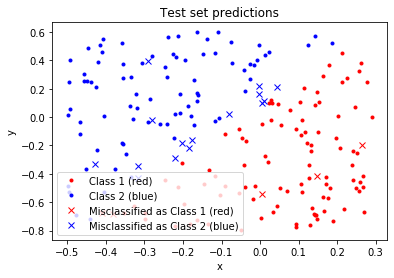

In [4]:
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]==pred[0])], '.', color='red', label='Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]==pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]==pred[0])], '.', color='blue', label='Class 2 (blue)')
plt.plot(test_X[0, (pred[0]==0) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==0) & (test_Y[0]!=pred[0])], 'x', color='red', label='Misclassified as Class 1 (red)')
plt.plot(test_X[0, (pred[0]==1) & (test_Y[0]!=pred[0])], test_X[1, (pred[0]==1) & (test_Y[0]!=pred[0])], 'x', color='blue', label='Misclassified as Class 2 (blue)')
plt.title('Test set predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()